In [2]:
library(readr) # for importing the datafile
library(afex) # for the anova
library(tidyverse) # for restructuring it
library(rstatix) # for testing assumptions
library(ggpubr) # for graphical test of normality
library(emmeans) # for post-hoc tests


Loading required package: lme4

Loading required package: Matrix

************
Welcome to afex. For support visit: http://afex.singmann.science/

- Functions for ANOVAs: aov_car(), aov_ez(), and aov_4()
- Methods for calculating p-values with mixed(): 'S', 'KR', 'LRT', and 'PB'
- 'afex_aov' and 'mixed' objects can be passed to emmeans() for follow-up tests
- NEWS: emmeans() for ANOVA models now uses model = 'multivariate' as default.
- Get and set global package options with: afex_options()
- Set orthogonal sum-to-zero contrasts globally: set_sum_contrasts()
- For example analyses see: browseVignettes("afex")
************


Attaching package: ‘afex’


The following object is masked from ‘package:lme4’:

    lmer


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ dplyr   1.0.7
✔ tibble  3.1.6     ✔ stringr 1.4.0
✔ tidyr   1.2.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyvers

In [3]:
d_long <- read.csv("puls_base_run.tsv", sep="\t")
names(d_long)[names(d_long) == "puls"] 
d_long


[1] "puls"

run,prob_nr,age,sex,group,time_point,puls,phase,run_phase,repetition,trial_type,condition
<int>,<int>,<int>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<chr>,<chr>
1,2,26,F,Musik,0,-4.75,-1,-1,0,pause,pause
2,2,26,F,Musik,0,2.27,-1,-1,0,pause,pause
1,3,23,M,Musik,0,-2.91,-1,-1,0,pause,pause
2,3,23,M,Musik,0,-1.72,-1,-1,0,pause,pause
1,5,25,M,Musik,0,2.42,-1,-1,0,pause,pause
2,5,25,M,Musik,0,13.38,-1,-1,0,pause,pause
1,6,27,M,Musik,0,2.45,-1,-1,0,pause,pause
2,6,27,M,Musik,0,5.02,-1,-1,0,pause,pause
1,7,24,F,Sound,0,-5.28,-1,-1,0,pause,pause


In [4]:
d_long$type <- as.factor(d_long$trial_type)
d_long$condition <- as.factor(d_long$condition)
d_long$group <- as.factor(d_long$group)
d_long$sex <- as.factor(d_long$sex)
d_long$puls <- as.numeric(d_long$puls)
d_long$time<- as.factor(paste(d_long$run, d_long$repetition, sep = "_"))

# bad data structure. See what happens if I eliminate all rows that are "pause" in "condition"

d_long_new <- d_long[d_long$condition != "pause", ] 

In [5]:
d_long_new


,run,prob_nr,age,sex,group,time_point,puls,phase,run_phase,repetition,trial_type,condition,type,time
,<int>,<int>,<int>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<int>,<chr>,<fct>,<fct>,<fct>
241,1,2,26,F,Musik,5,-4.75,0,0,1,relax,rotation,relax,1_1
242,2,2,26,F,Musik,5,2.27,0,8,1,stress,rotation,stress,2_1
243,1,3,23,M,Musik,5,-2.91,0,0,1,relax,rotation,relax,1_1
244,2,3,23,M,Musik,5,-1.72,0,8,1,stress,rotation,stress,2_1
245,1,5,25,M,Musik,5,2.42,0,0,1,relax,rotation,relax,1_1
246,2,5,25,M,Musik,5,13.38,0,8,1,stress,rotation,stress,2_1
247,1,6,27,M,Musik,5,2.45,0,0,1,relax,rotation,relax,1_1
248,2,6,27,M,Musik,5,5.02,0,8,1,stress,rotation,stress,2_1
249,1,7,24,F,Sound,5,-5.28,0,0,1,relax,rotation,relax,1_1


In [6]:
summary(d_long_new)

      run         prob_nr           age        sex        group     
 Min.   :1.0   Min.   : 2.00   Min.   :21.00   F:7848   Musik:8502  
 1st Qu.:1.0   1st Qu.: 9.75   1st Qu.:23.00   M:7848   Sound:7194  
 Median :1.5   Median :15.50   Median :24.00                        
 Mean   :1.5   Mean   :15.83   Mean   :24.21                        
 3rd Qu.:2.0   3rd Qu.:22.25   3rd Qu.:25.00                        
 Max.   :2.0   Max.   :29.00   Max.   :30.00                        
   time_point         puls              phase         run_phase     
 Min.   :  5.0   Min.   :-14.2500   Min.   :0.000   Min.   : 0.000  
 1st Qu.:106.0   1st Qu.: -2.8925   1st Qu.:1.000   1st Qu.: 3.000  
 Median :227.0   Median : -0.1500   Median :3.000   Median : 7.500  
 Mean   :237.2   Mean   :  0.4719   Mean   :3.498   Mean   : 7.498  
 3rd Qu.:369.0   3rd Qu.:  3.4500   3rd Qu.:6.000   3rd Qu.:11.000  
 Max.   :470.0   Max.   : 24.8500   Max.   :7.000   Max.   :15.000  
   repetition     trial_type      

In [7]:
# our four factors are:
# music vs sound (d_long$group, btw)
# stress vs relaxation (d_long$type, wth)
# maths vs rotation (d_long$condition, wth)
# run + repetition within run (d_long$time, wth)
# 
# covariates are:
# age (d_long$age, btw)
# gender (d_long$sex, btw)

Test assumptions

In [8]:
# 1) normality

d_long_new %>%
  group_by(time, type, condition, group) %>%
  shapiro_test(puls)

d_long_new %>%
  group_by(time, type, condition, group) %>%
  summary()

group,condition,type,time,variable,statistic,p
<fct>,<fct>,<fct>,<fct>,<chr>,<dbl>,<dbl>
Musik,math,relax,1_1,puls,0.9774018,2.467343e-07
Sound,math,relax,1_1,puls,0.8646255,2.452399e-19
Musik,rotation,relax,1_1,puls,0.9570707,2.420065e-11
Sound,rotation,relax,1_1,puls,0.9544358,1.404185e-10
Musik,math,stress,1_1,puls,0.9474871,8.232924e-13
Sound,math,stress,1_1,puls,0.9746339,4.609291e-07
Musik,rotation,stress,1_1,puls,0.9734624,3.043573e-08
Sound,rotation,stress,1_1,puls,0.9801746,7.873929e-06
Musik,math,relax,1_2,puls,0.9269430,1.958971e-15


      run         prob_nr           age        sex        group     
 Min.   :1.0   Min.   : 2.00   Min.   :21.00   F:7848   Musik:8502  
 1st Qu.:1.0   1st Qu.: 9.75   1st Qu.:23.00   M:7848   Sound:7194  
 Median :1.5   Median :15.50   Median :24.00                        
 Mean   :1.5   Mean   :15.83   Mean   :24.21                        
 3rd Qu.:2.0   3rd Qu.:22.25   3rd Qu.:25.00                        
 Max.   :2.0   Max.   :29.00   Max.   :30.00                        
   time_point         puls              phase         run_phase     
 Min.   :  5.0   Min.   :-14.2500   Min.   :0.000   Min.   : 0.000  
 1st Qu.:106.0   1st Qu.: -2.8925   1st Qu.:1.000   1st Qu.: 3.000  
 Median :227.0   Median : -0.1500   Median :3.000   Median : 7.500  
 Mean   :237.2   Mean   :  0.4719   Mean   :3.498   Mean   : 7.498  
 3rd Qu.:369.0   3rd Qu.:  3.4500   3rd Qu.:6.000   3rd Qu.:11.000  
 Max.   :470.0   Max.   : 24.8500   Max.   :7.000   Max.   :15.000  
   repetition     trial_type      

In [9]:
# 2) homogeneity of variance (only for between-subject factors)

d_long %>%
  group_by(run, phase) %>%
  levene_test(puls~ group)
# not given, we need to correct the results.

run,phase,df1,df2,statistic,p
<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,-1,1,4150,49.452551,2.365980e-12
1,0,1,982,23.514855,1.440426e-06
1,1,1,982,48.103664,7.323904e-12
1,2,1,982,74.854975,2.042881e-17
1,3,1,982,2.814795,9.371702e-02
1,4,1,958,138.932096,4.838921e-30
1,5,1,982,46.568224,1.546240e-11
1,6,1,982,1.375900,2.410852e-01
1,7,1,982,9.536952,2.070331e-03


In [10]:
# 3) assumption of sphericity (only for within-subject factors)

# will be checked and corrected for automatically when computing the ANOVA. Look at that then.

Define model 

In [11]:
#model1 <- aov_ez("prob_id", # Variable/column defining your participants
#       "puls", # dv
#       d_long, # name of your dataframe
#       between = c("group", "sex"), # if sex was also included, this would be c('group', 'sex')
#       within = c("time", "condition", "type"), 
#       include_aov = TRUE)
#
#
#model1
#summary(model1)

In [12]:
# with pause excluded

model1 <- aov_ez("prob_nr", # Variable/column defining your participants
                 "puls", # dv
                 d_long_new, # name of your dataframe
                 between = c("group", "sex"), # if sex was also included, this would be c('group', 'sex')
                 within = c("time", "condition", "type"), 
                 include_aov = TRUE, na.rm=TRUE)
model1
summary(model1)


# we see that the assumption of sphericity was corrected for using the Greenhouse-Geisser correction
# we also see that we have an effect for time
# and for time*condition*type

Warning message:
“More than one observation per cell, aggregating the data using mean (i.e, fun_aggregate = mean)!”
Contrasts set to contr.sum for the following variables: group, sex



Anova Table (Type 3 tests)

Response: puls
                          Effect          df   MSE         F   ges p.value
1                          group       1, 20  3.28      0.94 <.001    .344
2                            sex       1, 20  3.28      0.24 <.001    .630
3                      group:sex       1, 20  3.28      0.64 <.001    .435
4                           time 1.25, 25.02 35.82 20.76 ***  .172   <.001
5                     group:time 1.25, 25.02 35.82      0.18  .002    .734
6                       sex:time 1.25, 25.02 35.82      0.66  .007    .458
7                 group:sex:time 1.25, 25.02 35.82      0.69  .007    .444
8                      condition       1, 20  9.66    5.36 *  .011    .031
9                group:condition       1, 20  9.66      0.63  .001    .437
10                 sex:condition       1, 20  9.66      0.04 <.001    .853
11           group:sex:condition       1, 20  9.66      1.65  .004    .213
12                          type       1, 20 76.62 37.75 


Univariate Type III Repeated-Measures ANOVA Assuming Sphericity

                               Sum Sq num Df Error SS den Df F value    Pr(>F)
(Intercept)                     78.18      1    65.63     20 23.8253 9.038e-05
group                            3.08      1    65.63     20  0.9377  0.344424
sex                              0.78      1    65.63     20  0.2388  0.630357
group:sex                        2.09      1    65.63     20  0.6357  0.434625
time                           930.02      3   895.96     60 20.7603 2.400e-09
group:time                       7.87      3   895.96     60  0.1756  0.912484
sex:time                        29.47      3   895.96     60  0.6579  0.581177
group:sex:time                  31.12      3   895.96     60  0.6946  0.558940
condition                       51.81      1   193.19     20  5.3639  0.031290
group:condition                  6.07      1   193.19     20  0.6288  0.437098
sex:condition                    0.34      1   193.19     20  0.0

In [13]:
model1$anova_table


,num Df,den Df,MSE,F,ges,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
group,1.000000,20.00000,3.281413,0.93774470,6.889016e-04,3.444241e-01
sex,1.000000,20.00000,3.281413,0.23884647,1.755555e-04,6.303565e-01
group:sex,1.000000,20.00000,3.281413,0.63573097,4.671349e-04,4.346254e-01
time,1.250787,25.01574,35.815815,20.76028855,1.724282e-01,4.569892e-05
group:time,1.250787,25.01574,35.815815,0.17564075,1.759663e-03,7.342450e-01
sex:time,1.250787,25.01574,35.815815,0.65790129,6.559516e-03,4.578181e-01
group:sex:time,1.250787,25.01574,35.815815,0.69462976,6.923177e-03,4.436592e-01
condition,1.000000,20.00000,9.659534,5.36394384,1.147465e-02,3.128972e-02
group:condition,1.000000,20.00000,9.659534,0.62881262,1.358933e-03,4.370978e-01


# post hoc tests:

In [14]:
m1_ph <- emmeans(model1, "type") # defining here which variables plus their interaction I would like to include in my posthoc-Tests
m1_ph
pairs(m1_ph) # gives you a massive table with all pair comparisons between the two significant factors, with p-values already corrected for multiple testing

# to combine pairs of factor levels define contrasts:
# e.g. test phases -1 to 3 against phases 4 to 7, but define that for each of the runs

 type   emmean    SE df lower.CL upper.CL
 relax   -2.31 0.401 20    -3.15    -1.47
 stress   3.22 0.511 20     2.15     4.29

Results are averaged over the levels of: group, sex, condition, time 
Confidence level used: 0.95 

 contrast       estimate  SE df t.ratio p.value
 relax - stress    -5.53 0.9 20  -6.144  <.0001

Results are averaged over the levels of: group, sex, condition, time 

In [15]:
m2_ph <- emmeans(model1, "time") # defining here which variables plus their interaction I would like to include in my posthoc-Tests
m2_ph
pairs(m2_ph) # gives you a massive table with all pair comparisons between the two significant factors, with p-values already corrected for multiple testing

# to combine pairs of factor levels define contrasts:
# e.g. test phases -1 to 3 against phases 4 to 7, but define that for each of the runs

 time emmean    SE df lower.CL upper.CL
 X1_1  2.870 0.524 20    1.778    3.963
 X1_2 -1.463 0.414 20   -2.328   -0.599
 X2_1  0.513 0.186 20    0.124    0.901
 X2_2 -0.102 0.165 20   -0.446    0.242

Results are averaged over the levels of: group, sex, type, condition 
Confidence level used: 0.95 

 contrast    estimate    SE df t.ratio p.value
 X1_1 - X1_2    4.333 0.909 20   4.765  0.0006
 X1_1 - X2_1    2.357 0.502 20   4.695  0.0007
 X1_1 - X2_2    2.972 0.570 20   5.212  0.0002
 X1_2 - X2_1   -1.976 0.494 20  -4.000  0.0036
 X1_2 - X2_2   -1.362 0.386 20  -3.530  0.0104
 X2_1 - X2_2    0.615 0.310 20   1.981  0.2281

Results are averaged over the levels of: group, sex, type, condition 
P value adjustment: tukey method for comparing a family of 4 estimates 

In [16]:
m3_ph <- emmeans(model1, "condition") # defining here which variables plus their interaction I would like to include in my posthoc-Tests
m3_ph
pairs(m3_ph) # gives you a massive table with all pair comparisons between the two significant factors, with p-values already corrected for multiple testing


 condition emmean    SE df lower.CL upper.CL
 math      0.8244 0.207 20    0.393    1.256
 rotation  0.0845 0.160 20   -0.249    0.418

Results are averaged over the levels of: group, sex, type, time 
Confidence level used: 0.95 

 contrast        estimate    SE df t.ratio p.value
 math - rotation     0.74 0.319 20   2.316  0.0313

Results are averaged over the levels of: group, sex, type, time 

In [17]:
m4_ph <- emmeans(model1, "type") # defining here which variables plus their interaction I would like to include in my posthoc-Tests
m4_ph
pairs(m4_ph) # gives you a massive table with all pair comparisons between the two significant factors, with p-values already corrected for multiple testing


 type   emmean    SE df lower.CL upper.CL
 relax   -2.31 0.401 20    -3.15    -1.47
 stress   3.22 0.511 20     2.15     4.29

Results are averaged over the levels of: group, sex, condition, time 
Confidence level used: 0.95 

 contrast       estimate  SE df t.ratio p.value
 relax - stress    -5.53 0.9 20  -6.144  <.0001

Results are averaged over the levels of: group, sex, condition, time 

In [18]:
m5_ph <- emmeans(model1, "condition", "type") # defining here which variables plus their interaction I would like to include in my posthoc-Tests
m5_ph
pairs(m5_ph) # gives you a massive table with all pair comparisons between the two significant factors, with p-values already corrected for multiple testing


type = relax:
 condition emmean    SE df lower.CL upper.CL
 math       -2.34 0.436 20    -3.25    -1.43
 rotation   -2.28 0.455 20    -3.23    -1.33

type = stress:
 condition emmean    SE df lower.CL upper.CL
 math        3.99 0.623 20     2.69     5.29
 rotation    2.45 0.488 20     1.43     3.47

Results are averaged over the levels of: group, sex, time 
Confidence level used: 0.95 

type = relax:
 contrast        estimate    SE df t.ratio p.value
 math - rotation  -0.0597 0.391 20  -0.153  0.8801

type = stress:
 contrast        estimate    SE df t.ratio p.value
 math - rotation   1.5395 0.455 20   3.382  0.0030

Results are averaged over the levels of: group, sex, time 

In [26]:
c1 <- list(run1vsrun2 = c(1, 1, -1, -1), 
           run1wdh = c(1, -1, 0, 0),
           run2wdh = c(0,0,1,-1)
        # this vector gives each line in the object 'm1_ph' a weight
          )

# if several contrasts are defined, these go into a list of vectors and each get their own name.
  
contrast(m2_ph, c1, adjust = "holm") # here we define how to adjust the alpha-level, specified here is the Bonferroni-Holm correction, 
                                     # which is less strict than the Bonferroni correction

# and we see: there is a difference, t(20) = 3.222, p = 0.0043

 contrast   estimate    SE df t.ratio p.value
 run1vsrun2    0.996 0.216 20   4.601  0.0004
 run1wdh       4.333 0.909 20   4.765  0.0004
 run2wdh       0.615 0.310 20   1.981  0.0615

Results are averaged over the levels of: group, sex, type, condition 
P value adjustment: holm method for 3 tests 

plots

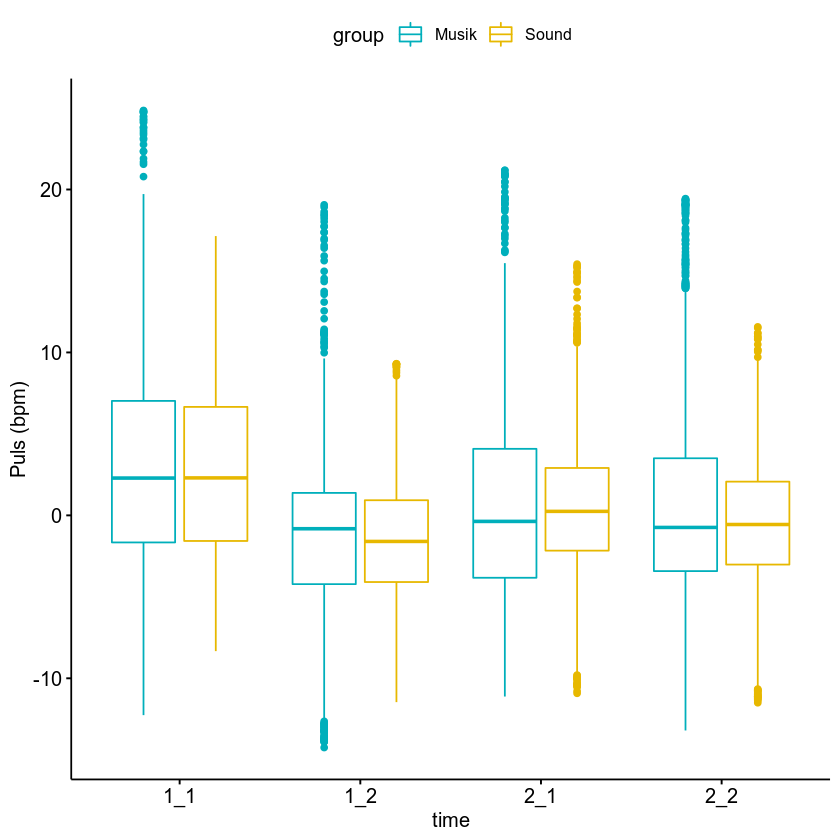

In [20]:
p_groupxtime1 <- ggboxplot(
  d_long_new, x = "time", y = "puls" ,ylab= "Puls (bpm)", 
  color = "group", palette = c("#00AFBB", "#E7B800")
)
p_groupxtime1

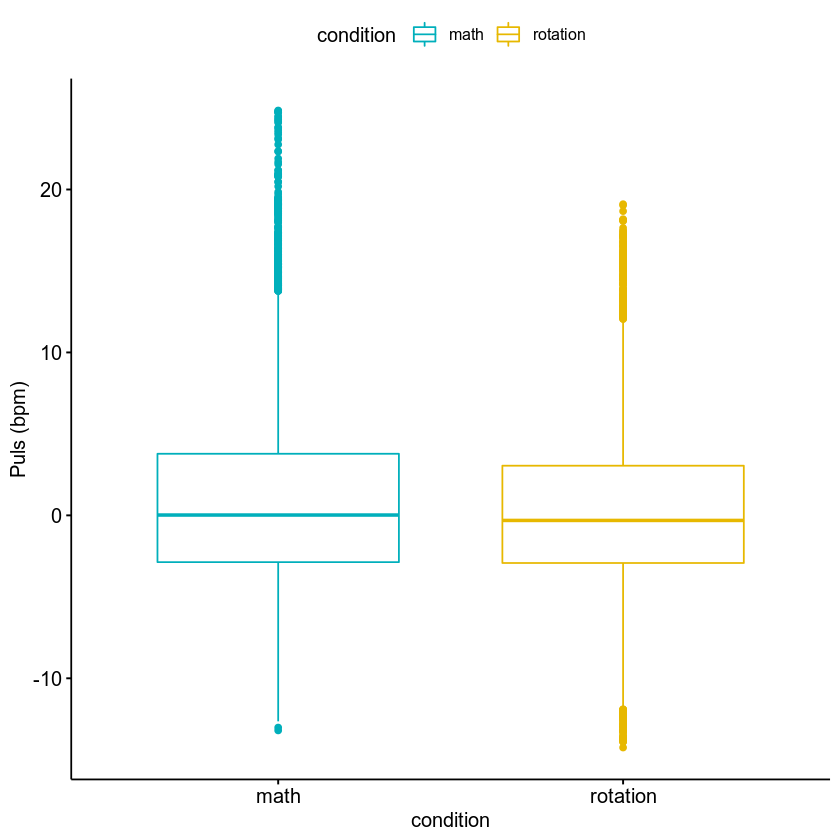

In [21]:
p_groupxtime2 <- ggboxplot(
  d_long_new, x = "condition", y = "puls", ylab= "Puls (bpm)", color = "condition",
  palette = c("#00AFBB", "#E7B800")
)
p_groupxtime2


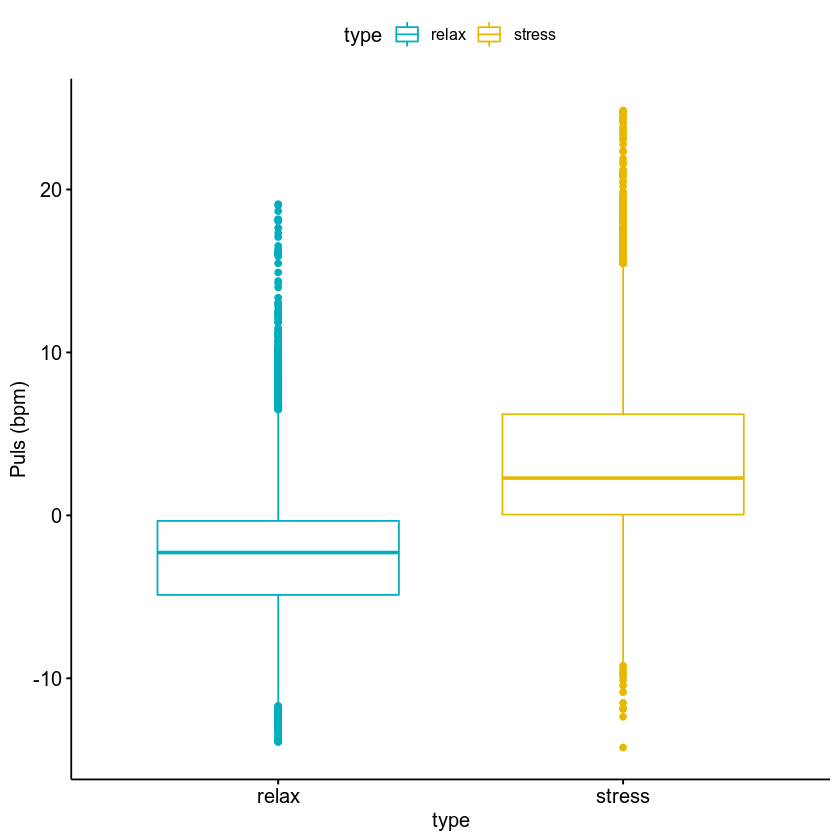

In [22]:
p_groupxtime3 <- ggboxplot(
  d_long_new, x = "type", y = "puls", ylab= "Puls (bpm)", 
  palette = c("#00AFBB", "#E7B800"), color = "type"
)
p_groupxtime3

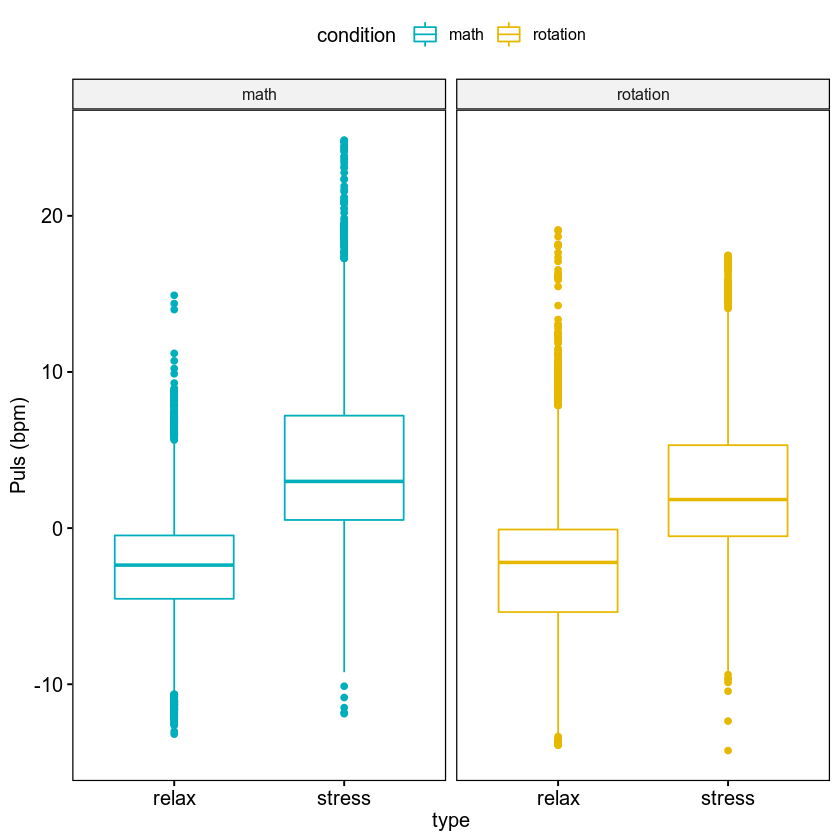

In [23]:
p_groupxtime4  <- ggboxplot(
  d_long_new, x = "type", y = "puls", facet.by = "condition", ylab= "Puls (bpm)", 
  color = "condition", palette = c("#00AFBB", "#E7B800"))
p_groupxtime4

In [24]:
# PNG device
png("plot1.png")
plot(p_groupxtime1)
dev.off()

png("plot2.png")
plot(p_groupxtime2)
dev.off()

png("plot3.png")
plot(p_groupxtime3)
dev.off()

png("plot4.png")
plot(p_groupxtime4)
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2